In [174]:
import pandas as pd
import xgboost as xgb

In [53]:
df = pd.read_csv('week 4 - Nashville_housing_data.csv')
df.head()

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,1/11/2013,20130118-0006337,No,No,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,1/18/2013,20130124-0008033,No,No,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,1/18/2013,20130128-0008863,No,No,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,1/23/2013,20130131-0009929,No,No,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,1/4/2013,20130118-0006110,No,No,...,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under


In [54]:
# Check for NA values
df.isna().sum()

Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                         2
Suite/ Condo   #                     22651
Property City                            2
Sale Date                                0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
City                                     0
State                                    0
Acreage                                  0
Tax District                             0
Neighborhood                             0
Land Value                               0
Building Value                           0
Finished Area                            1
Foundation Type                          1
Year Built                               0
Exterior Wall                            0
Grade                                    0
Bedrooms                                 3
Full Bath  

In [56]:
# Drop Suite/Condo # column 
df.drop(df.columns[4], axis=1, inplace=True)

# Drop NA value rows
df.dropna(inplace=True)

In [57]:
# Combine full and half baths
df['total_bathrooms'] = df['Full Bath'] + (df['Half Bath'] * 0.5)

In [58]:
# Drop original bathroom columns
df.drop(['Full Bath', 'Half Bath'], axis=1, inplace=True)
df.head()

,Unnamed: 0,Parcel ID,Land Use,Property Address,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,City,State,...,Land Value,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Sale Price Compared To Value,total_bathrooms
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,1/11/2013,20130118-0006337,No,No,NASHVILLE,TN,...,32000,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,Over,1.0
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,1/18/2013,20130124-0008033,No,No,NASHVILLE,TN,...,34000,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,Over,2.5
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,1/18/2013,20130128-0008863,No,No,NASHVILLE,TN,...,25000,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,Under,2.0
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,1/23/2013,20130131-0009929,No,No,NASHVILLE,TN,...,25000,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,Under,1.0
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,1/4/2013,20130118-0006110,No,No,NASHVILLE,TN,...,25000,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,Under,1.0


In [60]:
# Import Packages
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [66]:
structural_features = ['Year Built', 'Bedrooms', 'total_bathrooms', 'Finished Area',
                       'Exterior Wall', 'Foundation Type', 'Grade', 'Acreage']

In [67]:
# Copy Datset
df_model1 = df.copy()

In [ ]:
# Drop missing values
df_model1 = df_model1.dropna(subset=structural_features + ['Sale Price Compared To Value'])

In [ ]:
# Encode Grade
le_grade = LabelEncoder()
df_model1['Grade'] = le_grade.fit_transform(df_model1['Grade'])

# Encode Exterior Wall
le_wall = LabelEncoder()
df_model1['Exterior Wall'] = le_wall.fit_transform(df_model1['Exterior Wall'])

# Encode Foundation Type
le_foundation = LabelEncoder()
df_model1['Foundation Type'] = le_foundation.fit_transform(df_model1['Foundation Type'])

# Encode target variable
le_target = LabelEncoder()
df_model1['target'] = le_target.fit_transform(df_model1['Sale Price Compared To Value'])

In [ ]:
# Split into target and predictors
X = df_model1[structural_features]
y = df_model1['target']

In [ ]:
# Train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict
y_pred = clf.predict(X_test)

In [ ]:
# Results
print(classification_report(y_test, y_pred, target_names=le_target.classes_))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

        Over       0.76      0.76      0.76      3399
       Under       0.26      0.26      0.26      1109

    accuracy                           0.64      4508
   macro avg       0.51      0.51      0.51      4508
weighted avg       0.64      0.64      0.64      4508

[[2588  811]
 [ 825  284]]


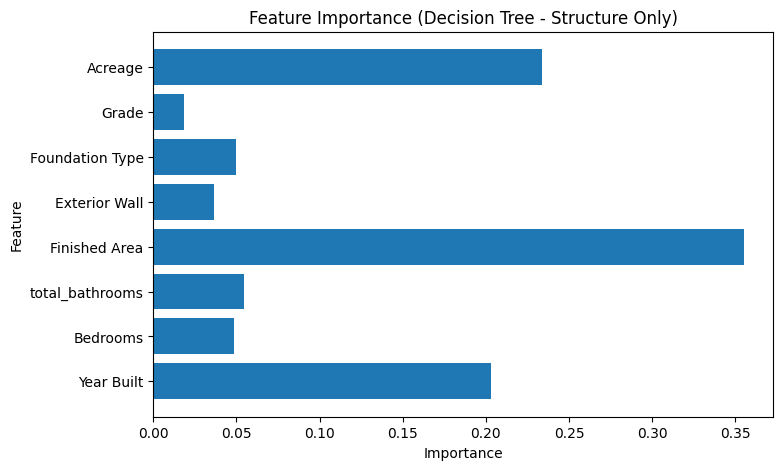

In [83]:
import matplotlib.pyplot as plt

importances = clf.feature_importances_
plt.figure(figsize=(8, 5))
plt.barh(structural_features, importances)
plt.title("Feature Importance (Decision Tree - Structure Only)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [84]:
# Copy Dataset
df_model2 = df.copy()

In [152]:
# Remove both Parcel ID and the target column
all_features = df_model2.columns.tolist()

# Remove non-features
for col in ['Parcel ID', 'target', 'Sale Price Compared To Value', 'Sale Date', 
            'Property Address', 'Legal Reference', 'State', 'Unnamed: 0']:
    if col in all_features:
        all_features.remove(col)

In [153]:
# Drop missing values
df_model2 = df_model2.dropna(subset=all_features + ['Sale Price Compared To Value'])

In [154]:
# Encode categoricals
categorical_cols = [
    'Grade', 'Exterior Wall', 'Foundation Type', 'Land Use',
    'City', 'Tax District', 'Neighborhood',
    'Sold As Vacant', 'Multiple Parcels Involved in Sale'
]

# Encode each
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_model2[col] = le.fit_transform(df_model2[col])
    encoders[col] = le

In [155]:
# Encode target variable
le_target2 = LabelEncoder()
df_model2['target'] = le_target2.fit_transform(df_model2['Sale Price Compared To Value'])

In [156]:
# Split into target and predictors
X2 = df_model2[all_features]
y2 = df_model2['target']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)


In [157]:
# Train Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X2_train, y2_train)

RandomForestClassifier(random_state=42)

In [158]:
# Predict
y2_pred = rf.predict(X2_test)

In [159]:
# Metrics
print(classification_report(y2_test, y2_pred, target_names=le_target2.classes_))
print(confusion_matrix(y2_test, y2_pred))

              precision    recall  f1-score   support

        Over       0.77      0.91      0.83      3399
       Under       0.37      0.16      0.23      1109

    accuracy                           0.73      4508
   macro avg       0.57      0.54      0.53      4508
weighted avg       0.67      0.73      0.68      4508

[[3093  306]
 [ 929  180]]


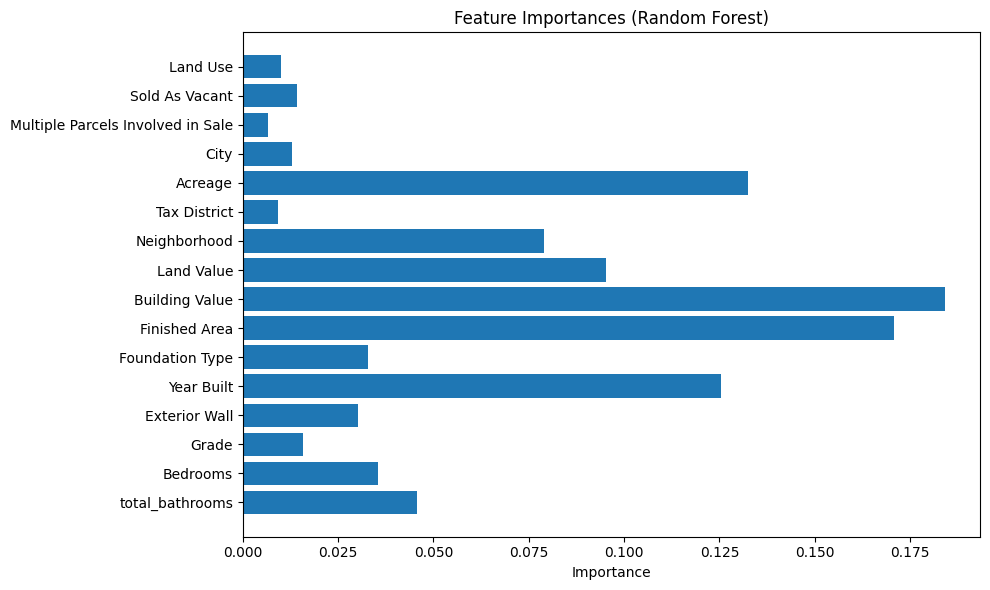

In [160]:
# Plot
importances = rf.feature_importances_
feature_names = X2.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [165]:
# Feature selection
selected_features = [
    # Structural
    'Acreage', 'Land Value', 'Building Value', 'Finished Area',
    'Bedrooms', 'total_bathrooms', 'Year Built',
    'Grade',

    # Location
    'Neighborhood', 'Tax District', 'City',

    # Market timing
    'Sale Month', 'Sale Year'
]


In [166]:
# Copy Dataset
df_model3 = df.copy()
df_model3.columns = df_model3.columns.str.strip()

In [167]:
# Parse date variables
df_model3['Sale Date'] = pd.to_datetime(df_model3['Sale Date'], errors='coerce')
df_model3['Sale Year'] = df_model3['Sale Date'].dt.year
df_model3['Sale Month'] = df_model3['Sale Date'].dt.month

In [168]:
# Drop missing values
df_model3 = df_model3.dropna(subset=selected_features + ['Sale Price Compared To Value'])

In [169]:
# Encode categorical features 
encode_cols = ['Grade', 'Tax District', 'Neighborhood', 'City']

encoders3 = {}
for col in encode_cols:
    le = LabelEncoder()
    df_model3[col] = le.fit_transform(df_model3[col])
    encoders3[col] = le

In [170]:
# Encode target
le_target3 = LabelEncoder()
df_model3['target'] = le_target3.fit_transform(df_model3['Sale Price Compared To Value'])

In [171]:
# Split
X3 = df_model3[selected_features]
y3 = df_model3['target']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [ ]:
from xgboost import XGBClassifier

gbt = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
gbt.fit(X3_train, y3_train)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:45:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [176]:
# Predict
y3_pred = gbt.predict(X3_test)

In [177]:
# Metrics
print(classification_report(y3_test, y3_pred, target_names=le_target3.classes_))
print(confusion_matrix(y3_test, y3_pred))

              precision    recall  f1-score   support

        Over       0.81      0.93      0.87      3399
       Under       0.62      0.33      0.43      1109

    accuracy                           0.79      4508
   macro avg       0.72      0.63      0.65      4508
weighted avg       0.76      0.79      0.76      4508

[[3178  221]
 [ 742  367]]


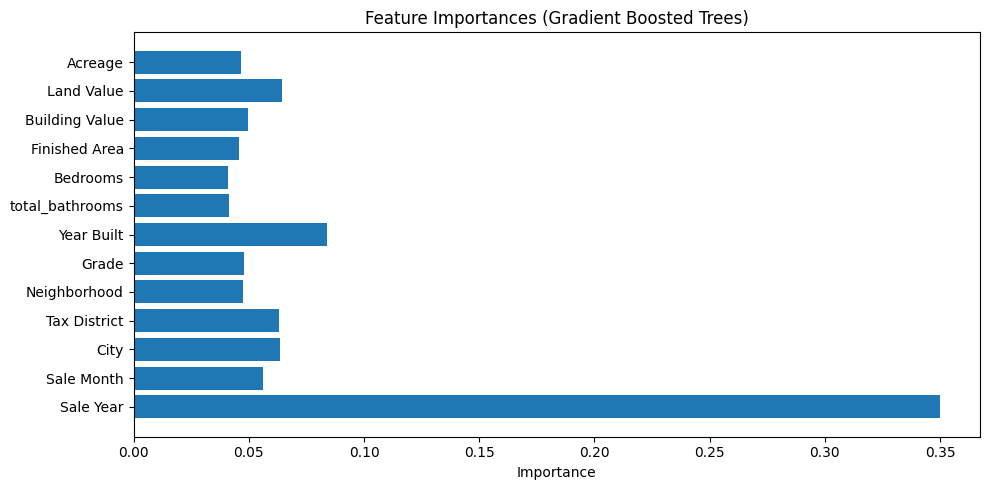

In [178]:
# Plot
importances = gbt.feature_importances_
plt.figure(figsize=(10, 5))
plt.barh(selected_features, importances)
plt.title("Feature Importances (Gradient Boosted Trees)")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [180]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define metric function
def get_metrics(y_true, y_pred, average='weighted'):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average=average, zero_division=0),
        'Recall': recall_score(y_true, y_pred, average=average, zero_division=0),
        'F1 Score': f1_score(y_true, y_pred, average=average, zero_division=0)
    }

# Gather metrics
metrics_model1 = get_metrics(y_test, y_pred)
metrics_model2 = get_metrics(y2_test, y2_pred)
metrics_model3 = get_metrics(y3_test, y3_pred)

# Combine into a DataFrame
comparison_df = pd.DataFrame({
    'Model 1 (Decision Tree)': metrics_model1,
    'Model 2 (Random Forest)': metrics_model2,
    'Model 3 (Gradient Boosting)': metrics_model3
})

comparison_df = comparison_df.T.round(4)
print(comparison_df)


                             Accuracy  Precision  Recall  F1 Score
Model 1 (Decision Tree)        0.6371     0.6355  0.6371    0.6363
Model 2 (Random Forest)        0.7260     0.6709  0.7260    0.6840
Model 3 (Gradient Boosting)    0.7864     0.7648  0.7864    0.7612
